In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Load the data
df = pd.read_csv('./datasets/walmart_data.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: >

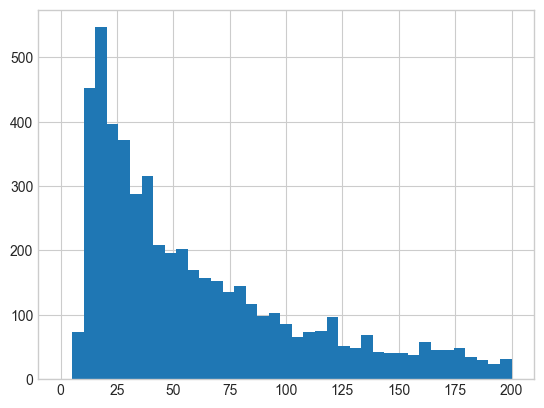

In [25]:
df.groupby(['user_id']).product_id.count().hist(bins=np.linspace(0, 200, 40))

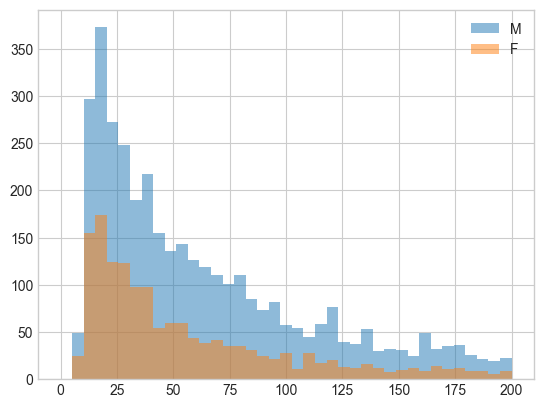

In [30]:
df.groupby(['user_id', 'gender']).product_id.count().unstack().pipe(
    lambda d: (
        d.M.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='M'), 
        d.F.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='F')
    )
)
plt.legend()

<Axes: xlabel='product_id'>

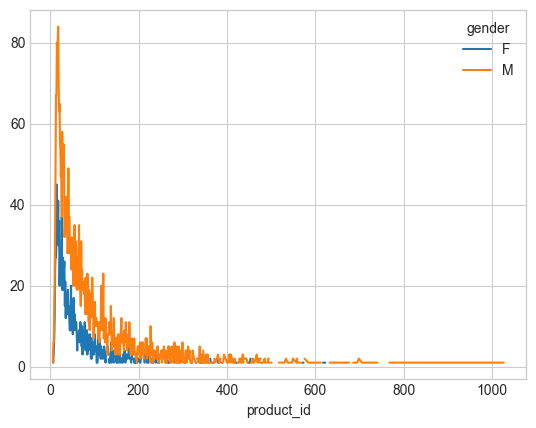

In [39]:
df.groupby(['user_id', 'gender']).product_id.count().reset_index().groupby([
    'product_id',
    'gender',
]).user_id.count().unstack().plot()

<Axes: xlabel='product_id'>

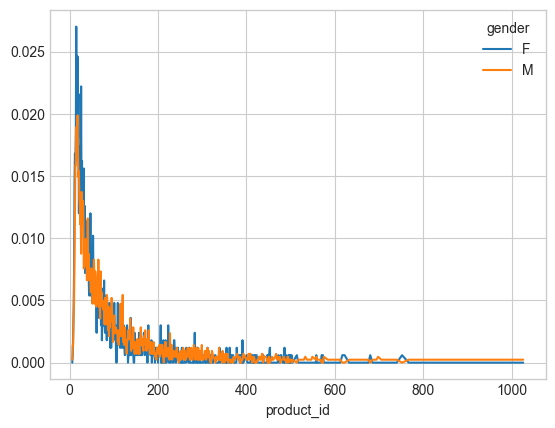

In [44]:
df.groupby(['user_id', 'gender']).product_id.count().reset_index().groupby([
    'product_id',
    'gender',
]).user_id.count().unstack().fillna(0).apply(
    lambda s: s / s.sum()
).plot()

In [46]:
# get the number of purchases per user and keep track of gender
purchases_per_user = df.groupby(['user_id', 'gender']).product_id.count().reset_index()
purchases_per_user

,user_id,gender,product_id
0,1000001,F,35
1,1000002,M,77
2,1000003,M,29
3,1000004,M,14
4,1000005,M,106
...,...,...,...
5886,1006036,F,514
5887,1006037,F,122
5888,1006038,F,12
5889,1006039,F,74


In [51]:
# number of users for each number of purchases with gender
number_of_users_that_purchased_n_items = purchases_per_user.groupby(['product_id', 'gender']).user_id.count().unstack().fillna(0)
number_of_users_that_purchased_n_items

gender,F,M
product_id,,
6,0.0,1.0
7,1.0,6.0
8,4.0,6.0
9,7.0,15.0
10,12.0,21.0
...,...,...
823,0.0,1.0
862,0.0,1.0
898,0.0,1.0


<Axes: xlabel='product_id'>

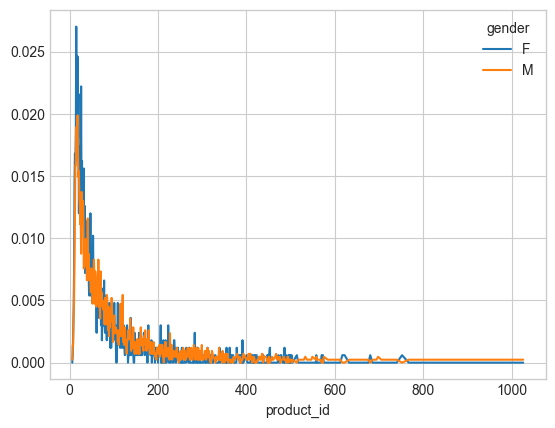

In [55]:
# normalize the data
normalized_number_of_users_that_purchased_n_items = number_of_users_that_purchased_n_items / number_of_users_that_purchased_n_items.sum()
normalized_number_of_users_that_purchased_n_items.plot()

# Purchase Example

In [56]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [57]:
# item level by gender
df.groupby(['gender']).agg({
    'purchase': ['mean', 'std', 'count', 'sum', 'min', 'max']
})

purchase                                            
               mean          std   count         sum min    max
gender                                                         
F       8734.565765  4767.233289  135809  1186232642  12  23959
M       9437.526040  5092.186210  414259  3909580100  12  23961

In [60]:

purchases_by_user_and_age = df.groupby(['user_id','gender', 'age'])[['purchase']].sum().reset_index()
purchases_by_user_and_age

,user_id,gender,age,purchase
0,1000001,F,0-17,334093
1,1000002,M,55+,810472
2,1000003,M,26-35,341635
3,1000004,M,46-50,206468
4,1000005,M,26-35,821001
...,...,...,...,...
5886,1006036,F,26-35,4116058
5887,1006037,F,46-50,1119538
5888,1006038,F,55+,90034
5889,1006039,F,46-50,590319


<Axes: xlabel='gender'>

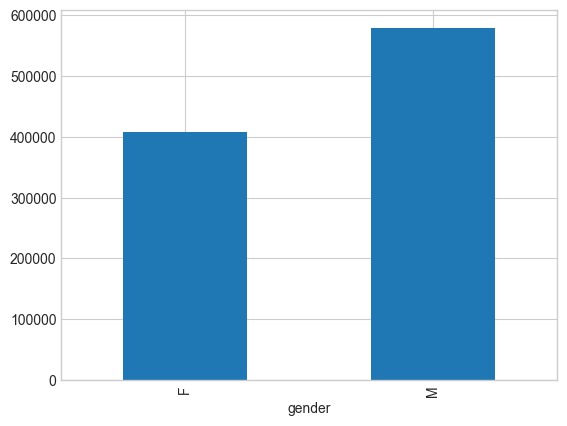

In [63]:
purchases_by_user_and_age.groupby('gender').purchase.agg(['min','median', 'max','mean','std', 'count'])['median'].plot(kind='bar')

In [65]:
purchases_by_user_and_age.groupby(['age', 'gender',]).purchase.agg(['min','median', 'max','mean','std', 'count'])

min    median       max          mean           std  count
age   gender                                                              
0-17  F       85482  361029.0   5628655  5.434100e+05  7.889563e+05     78
      M       75931  494850.0   3762050  6.609086e+05  6.222134e+05    140
18-25 F       53996  440927.0   4129632  7.159437e+05  7.443469e+05    287
      M       57805  581170.5   6477160  9.058476e+05  9.303900e+05    782
26-35 F       49668  461253.0   6187094  8.128004e+05  9.336211e+05    545
      M       49288  682712.0   8699596  1.053577e+06  1.057847e+06   1508
36-45 F       61972  438843.0   4531525  7.310479e+05  7.800634e+05    333
      M       55960  550273.0  10536909  9.390059e+05  1.045844e+06    834
46-50 F       62250  371646.5   4002639  6.412465e+05  7.170474e+05    182
      M       64640  523983.0   6044415  8.714514e+05  1.014697e+06    349
51-55 F       46681  366159.5   4799461  6.300422e+05  7.274191e+05    142
      M       49349  513422.0   4688662  8.189783e+05  8.125327e+05    339
55+   F       52371  328953.0   2103196  4.624522e+05  4.421556e+05     99
      M       54536  339364.0   5962012  5.677092e+05  6.683244e+05    273

<Axes: xlabel='age'>

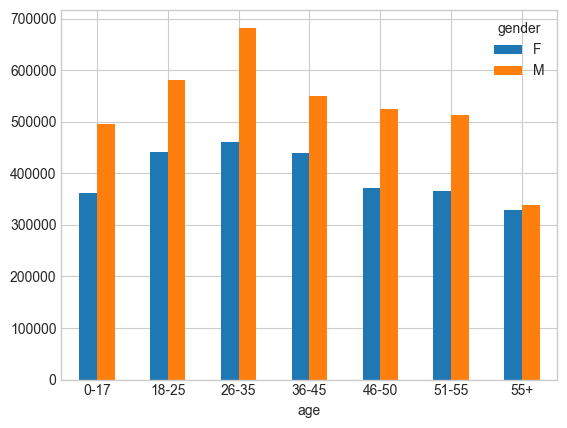

In [68]:
purchases_by_user_and_age.groupby(['age', 'gender',]).purchase.agg(['min','median', 'max','mean','std', 'count'])['median'].unstack().plot(
    kind='bar',
    rot=0
)

<Axes: xlabel='age'>

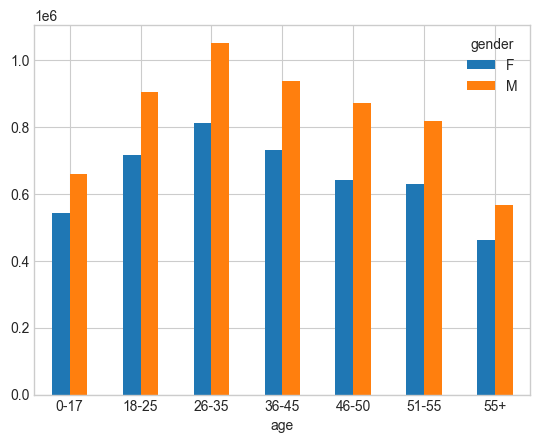

In [69]:
purchases_by_user_and_age.groupby(['age', 'gender',]).purchase.agg(['min','median', 'max','mean','std', 'count'])['mean'].unstack().plot(
    kind='bar',
    rot=0
)

<Axes: xlabel='occupation'>

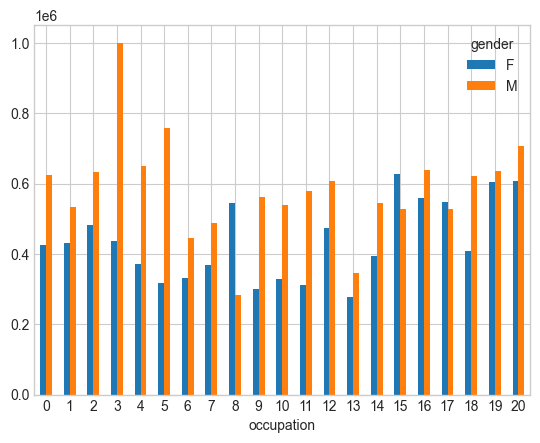

In [71]:

df.groupby(['user_id','gender', 'occupation'])[['purchase']].sum().reset_index().groupby([
    'occupation','gender',
]).purchase.agg(['min','median', 'max','mean','std', 'count'])['median'].unstack().plot(
    kind='bar',
    rot=0
)
